### Setup

In [231]:
# Import the NetworkX package
import networkx as nx


In [232]:
G = nx.karate_club_graph()

# G is an undirected graph
type(G)

networkx.classes.graph.Graph

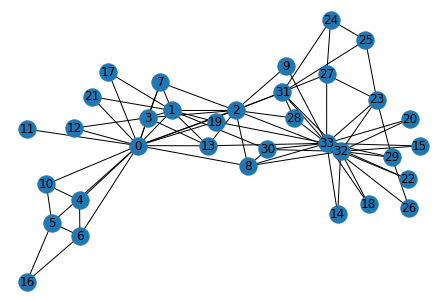

In [233]:
# Visualize the graph
nx.draw(G, with_labels = True)

In [234]:
def average_degree(num_edges, num_nodes):
  # TODO: Implement this function that takes number of edges
  # and number of nodes, and returns the average node degree of 
  # the graph. Round the result to nearest integer (for example 
  # 3.3 will be rounded to 3 and 3.7 will be rounded to 4)

  avg_degree = 0

  ############# Your code here ############
  if num_nodes == 0:
      return 0
  return round((2 * num_edges) / num_nodes)

  #########################################

  return avg_degree

num_edges = G.number_of_edges()
num_nodes = G.number_of_nodes()
avg_degree = average_degree(num_edges, num_nodes)
print("Average degree of karate club network is {}".format(avg_degree))

Average degree of karate club network is 5


In [235]:
def average_clustering_coefficient(G):
  # TODO: Implement this function that takes a nx.Graph
  # and returns the average clustering coefficient. Round 
  # the result to 2 decimal places (for example 3.333 will
  # be rounded to 3.33 and 3.7571 will be rounded to 3.76)
  avg_cluster_coef = 0

  ############# Your code here ############
  ## Note: 
  ## 1: Please use the appropriate NetworkX clustering function
  return round(nx.average_clustering(G), 2)

  #########################################

  return avg_cluster_coef

avg_cluster_coef = average_clustering_coefficient(G)
print("Average clustering coefficient of karate club network is {}".format(avg_cluster_coef))

Average clustering coefficient of karate club network is 0.57


In [236]:
def one_iter_pagerank(G, beta, r0, node_id):
  # TODO: Implement this function that takes a nx.Graph, beta, r0 and node id.
  # The return value r1 is one interation PageRank value for the input node.
  # Please round r1 to 2 decimal places.

  ############# Your code here ############
  ## Note: 
  ## 1: You should not use nx.pagerank
  return round(beta * (r0 / G.degree([node_id])[0]) + (1 - beta) * (1 / G.number_of_nodes()), 2)
  #########################################

beta = 0.8
r0 = 1 / G.number_of_nodes()
node = 0
r1 = one_iter_pagerank(G, beta, r0, node)
print("The PageRank value for node 0 after one iteration is {}".format(r1))

The PageRank value for node 0 after one iteration is 0.01


In [237]:
def closeness_centrality(G, node=5):
  # TODO: Implement the function that calculates closeness centrality 
  # for a node in karate club network. G is the input karate club 
  # network and node is the node id in the graph. Please round the 
  # closeness centrality result to 2 decimal places.

  closeness = 0
  ## Note:
  ## 1: You can use networkx closeness centrality function.
  ## 2: Notice that networkx closeness centrality returns the normalized 
  ## closeness directly, which is different from the raw (unnormalized) 
  ## one that we learned in the lecture.
  closeness = round(nx.closeness_centrality(G, node) / (G.number_of_nodes() - 1), 2)
  #########################################

  return closeness

node = 5
closeness = closeness_centrality(G, node=node)
print("The karate club network has closeness centrality {}".format(closeness))


The karate club network has closeness centrality 0.01


In [238]:
import torch
print(torch.__version__)

1.7.0


In [239]:
# Generate 3 x 4 tensor with all ones
ones = torch.ones(3, 4)
print(ones)

# Generate 3 x 4 tensor with all zeros
zeros = torch.zeros(3, 4)
print(zeros)

# Generate 3 x 4 tensor with random values on the interval [0, 1)
random_tensor = torch.rand(3, 4)
print(random_tensor)

# Get the shape of the tensor
print(ones.shape)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])
tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])
tensor([[0.2417, 0.9127, 0.7875, 0.6463],
        [0.1192, 0.1317, 0.9079, 0.4481],
        [0.0022, 0.4382, 0.3800, 0.5075]])
torch.Size([3, 4])


In [240]:
# Create a 3 x 4 tensor with all 32-bit floating point zeros
zeros = torch.zeros(3, 4, dtype=torch.float32)
print(zeros.dtype)

# Change the tensor dtype to 64-bit integer
zeros = zeros.type(torch.long)
print(zeros.dtype)

torch.float32
torch.int64


In [241]:
def graph_to_edge_list(G):
  # TODO: Implement the function that returns the edge list of
  # an nx.Graph. The returned edge_list should be a list of tuples
  # where each tuple is a tuple representing an edge connected 
  # by two nodes.

  edge_list = []

  ############# Your code here ############
  edge_list = [(e[0], e[1]) for e in nx.to_edgelist(G)]
  #########################################

  return edge_list

def edge_list_to_tensor(edge_list):
  # TODO: Implement the function that transforms the edge_list to
  # tensor. The input edge_list is a list of tuples and the resulting
  # tensor should have the shape [2 x len(edge_list)].

  edge_index = torch.tensor([])

  ############# Your code here ############

  #########################################

  return torch.IntTensor(edge_list).t()

pos_edge_list = graph_to_edge_list(G)
pos_edge_index = edge_list_to_tensor(pos_edge_list)
print("The pos_edge_index tensor has shape {}".format(pos_edge_index.shape))
print("The pos_edge_index tensor has sum value {}".format(torch.sum(pos_edge_index)))

The pos_edge_index tensor has shape torch.Size([2, 78])
The pos_edge_index tensor has sum value 2535


In [242]:
import random

def sample_negative_edges(G, num_neg_samples):
  # TODO: Implement the function that returns a list of negative edges.
  # The number of sampled negative edges is num_neg_samples. You do not
  # need to consider the corner case when the number of possible negative edges
  # is less than num_neg_samples. It should be ok as long as your implementation 
  # works on the karate club network. In this implementation, self loop should 
  # not be considered as either a positive or negative edge. Also, notice that 
  # the karate club network is an undirected graph, if (0, 1) is a positive 
  # edge, do you think (1, 0) can be a negative one?
  
  all_negative_edges = []
  neg_edge_list = []

  ############# Your code here ############
  nNodes = G.number_of_nodes()
  for u in range(nNodes):
      for v in range(nNodes):
          if v <= u:
              continue
          if not G.has_edge(u, v):
              all_negative_edges.append((u, v))
  sampled_indices = random.sample(range(0, len(all_negative_edges)), num_neg_samples)
  neg_edge_list = [all_negative_edges[i] for i in sampled_indices]
  #########################################

  return neg_edge_list

# Sample 78 negative edges
neg_edge_list = sample_negative_edges(G, len(pos_edge_list))

# Transform the negative edge list to tensor
neg_edge_index = edge_list_to_tensor(neg_edge_list)
print("The neg_edge_index tensor has shape {}".format(neg_edge_index.shape))
print(neg_edge_index[0])
# Which of following edges can be negative ones?
edge_1 = (7, 1)
edge_2 = (1, 33)
edge_3 = (33, 22)
edge_4 = (0, 4)
edge_5 = (4, 2)

############# Your code here ############
## Note:
## 1: For each of the 5 edges, print whether it can be negative edge

#########################################

The neg_edge_index tensor has shape torch.Size([2, 78])
tensor([12,  1, 18,  5,  2, 17,  5, 26,  7, 10, 29,  5, 16, 12, 13, 11, 12, 27,
         1,  3,  7, 24,  6, 14,  3, 20,  7,  2,  1, 11,  9, 12,  1,  9,  5, 19,
         4,  8, 22, 19, 15, 19,  6,  2, 15,  1,  4, 11,  3,  7,  7, 27, 19, 12,
        12, 24, 14,  1, 13,  7, 19,  6, 23,  7, 18,  7, 11, 16,  8,  9, 16, 10,
         7, 18,  6, 19,  0, 16], dtype=torch.int32)


In [243]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

print(torch.__version__)

1.7.0


In [244]:
# Initialize an embedding layer
# Suppose we want to have embedding for 4 items (e.g., nodes)
# Each item is represented with 8 dimensional vector

emb_sample = nn.Embedding(num_embeddings=4, embedding_dim=8)
print('Sample embedding layer: {}'.format(emb_sample))

Sample embedding layer: Embedding(4, 8)


In [245]:
# Select an embedding in emb_sample
id = torch.LongTensor([1])
print(emb_sample(id))

# Select multiple embeddings
ids = torch.LongTensor([1, 3])
print(emb_sample(ids))

# Get the shape of the embedding weight matrix
shape = emb_sample.weight.data.shape
print(shape)

# Overwrite the weight to tensor with all ones
emb_sample.weight.data = torch.ones(shape)

# Let's check if the emb is indeed initilized
ids = torch.LongTensor([0, 3])
print(emb_sample(ids))

tensor([[-4.4258e-01, -1.5349e+00,  1.1118e-03, -8.3201e-01,  6.3567e-01,
         -7.7746e-01, -5.5710e-02, -4.4338e-02]], grad_fn=<EmbeddingBackward>)
tensor([[-4.4258e-01, -1.5349e+00,  1.1118e-03, -8.3201e-01,  6.3567e-01,
         -7.7746e-01, -5.5710e-02, -4.4338e-02],
        [ 4.5921e-01,  8.7926e-02,  9.4428e-01, -7.5985e-01,  1.6396e+00,
         -1.9154e+00, -1.8657e+00, -6.7076e-01]], grad_fn=<EmbeddingBackward>)
torch.Size([4, 8])
tensor([[1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1.]], grad_fn=<EmbeddingBackward>)


In [246]:
# Please do not change / reset the random seed
torch.manual_seed(1)

def create_node_emb(num_node=34, embedding_dim=16):
  # TODO: Implement this function that will create the node embedding matrix.
  # A torch.nn.Embedding layer will be returned. You do not need to change 
  # the values of num_node and embedding_dim. The weight matrix of returned 
  # layer should be initialized under uniform distribution. 

  emb = nn.Embedding(num_embeddings=num_node, embedding_dim=embedding_dim)

  ############# Your code here ############
  emb.weight.data = torch.rand(emb.weight.data.shape)
  #########################################

  return emb

emb = create_node_emb()
ids = torch.LongTensor([0, 3])

# Print the embedding layer
print("Embedding: {}".format(emb))

# An example that gets the embeddings for node 0 and 3
print(emb(ids))

Embedding: Embedding(34, 16)
tensor([[0.2114, 0.7335, 0.1433, 0.9647, 0.2933, 0.7951, 0.5170, 0.2801, 0.8339,
         0.1185, 0.2355, 0.5599, 0.8966, 0.2858, 0.1955, 0.1808],
        [0.7486, 0.6546, 0.3843, 0.9820, 0.6012, 0.3710, 0.4929, 0.9915, 0.8358,
         0.4629, 0.9902, 0.7196, 0.2338, 0.0450, 0.7906, 0.9689]],
       grad_fn=<EmbeddingBackward>)


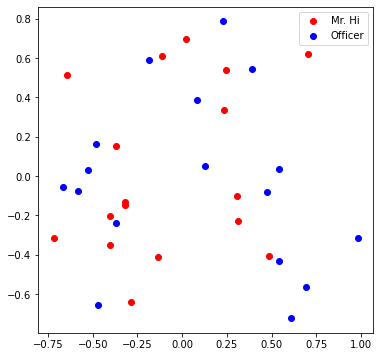

In [247]:
def visualize_emb(emb):
  X = emb.weight.data.numpy()
  pca = PCA(n_components=2)
  components = pca.fit_transform(X)
  plt.figure(figsize=(6, 6))
  club1_x = []
  club1_y = []
  club2_x = []
  club2_y = []
  for node in G.nodes(data=True):
    if node[1]['club'] == 'Mr. Hi':
      club1_x.append(components[node[0]][0])
      club1_y.append(components[node[0]][1])
    else:
      club2_x.append(components[node[0]][0])
      club2_y.append(components[node[0]][1])
  plt.scatter(club1_x, club1_y, color="red", label="Mr. Hi")
  plt.scatter(club2_x, club2_y, color="blue", label="Officer")
  plt.legend()
  plt.show()

# Visualize the initial random embeddding
visualize_emb(emb)

In [248]:
from torch.optim import SGD

def accuracy(pred, label):
  # TODO: Implement the accuracy function. This function takes the 
  # pred tensor (the resulting tensor after sigmoid) and the label 
  # tensor (torch.LongTensor). Predicted value greater than 0.5 will 
  # be classified as label 1. Else it will be classified as label 0.
  # The returned accuracy should be rounded to 4 decimal places. 
  # For example, accuracy 0.82956 will be rounded to 0.8296.

  accu = 0.0

  ############# Your code here ############
  failed = pred > 0.5
  failed = failed.type(torch.long)
  accu = (torch.numel(label) - torch.abs(failed - label).sum()) / torch.numel(label)
  #########################################

  return accu

def train(emb, loss_fn, sigmoid, train_label, train_edge):
  # TODO: Train the embedding layer here. You can also change epochs and 
  # learning rate. In general, you need to implement: 
  # (1) Get the embeddings of the nodes in train_edge
  # (2) Dot product the embeddings between each node pair
  # (3) Feed the dot product result into sigmoid
  # (4) Feed the sigmoid output into the loss_fn
  # (5) Print both loss and accuracy of each epoch 
  # (as a sanity check, the loss should decrease during training)

  epochs = 500
  learning_rate = 0.1

  optimizer = SGD(emb.parameters(), lr=learning_rate, momentum=0.9)

  loss_list = []
  acc_list = []

  for i in range(epochs):

    ############# Your code here ############
    optimizer.zero_grad()
    m, n = train_edge.shape
    pred = torch.empty(n)
    for j in range(y):
        pred[j] = torch.dot(emb(train_edge[0][j].type(torch.long)), emb(train_edge[1][j].type(torch.long)))
    pred = sigmoid(pred)
    loss = loss_fn(pred, train_label)
    loss.backward()
    optimizer.step()
    acc = accuracy(pred, train_label)
    # if acc > 0.98:
    #     print("Early stoping")
    #     return loss_list, acc_list
    #     break
    print('[%5d] loss: %.3f acc: %.3f' % (i + 1, loss, acc))
    acc_list.append(acc)
    loss_list.append(loss)
    #########################################
  return loss_list, acc_list

loss_fn = nn.BCELoss()
sigmoid = nn.Sigmoid()

# Generate the positive and negative labels
pos_label = torch.ones(pos_edge_index.shape[1], )
neg_label = torch.zeros(neg_edge_index.shape[1], )

# Concat positive and negative labels into one tensor
train_label = torch.cat([pos_label, neg_label], dim=0)

# Concat positive and negative edges into one tensor
# Since the network is very small, we do not split the edges into val/test sets
train_edge = torch.cat([pos_edge_index, neg_edge_index], dim=1)

loss_list, acc_list = train(emb, loss_fn, sigmoid, train_label, train_edge)

[    1] loss: 1.970 acc: 0.500
[    2] loss: 1.956 acc: 0.500
[    3] loss: 1.931 acc: 0.500
[    4] loss: 1.895 acc: 0.500
[    5] loss: 1.850 acc: 0.500
[    6] loss: 1.798 acc: 0.500
[    7] loss: 1.740 acc: 0.500
[    8] loss: 1.678 acc: 0.500
[    9] loss: 1.613 acc: 0.500
[   10] loss: 1.546 acc: 0.500
[   11] loss: 1.479 acc: 0.500
[   12] loss: 1.412 acc: 0.500
[   13] loss: 1.346 acc: 0.500
[   14] loss: 1.282 acc: 0.500
[   15] loss: 1.220 acc: 0.500
[   16] loss: 1.162 acc: 0.500
[   17] loss: 1.106 acc: 0.506
[   18] loss: 1.054 acc: 0.506
[   19] loss: 1.006 acc: 0.506
[   20] loss: 0.961 acc: 0.506
[   21] loss: 0.920 acc: 0.506
[   22] loss: 0.883 acc: 0.513
[   23] loss: 0.848 acc: 0.532
[   24] loss: 0.817 acc: 0.532
[   25] loss: 0.788 acc: 0.532
[   26] loss: 0.763 acc: 0.545
[   27] loss: 0.739 acc: 0.558
[   28] loss: 0.718 acc: 0.577
[   29] loss: 0.699 acc: 0.583
[   30] loss: 0.682 acc: 0.590
[   31] loss: 0.666 acc: 0.609
[   32] loss: 0.651 acc: 0.609
[   33] 

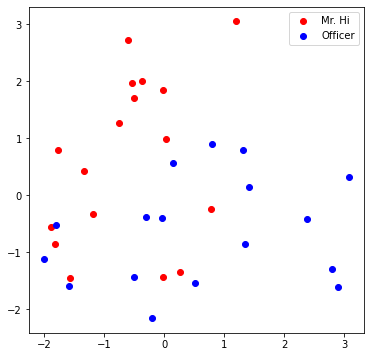

In [249]:
# Visualize the final learned embedding
visualize_emb(emb)

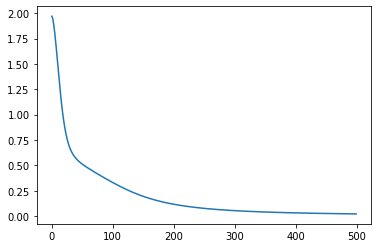

In [250]:
plt.plot(loss_list)


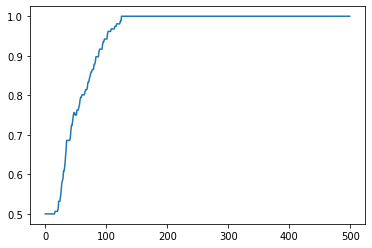

In [251]:
plt.plot(acc_list)